# seaborn.objects Recipes

In [35]:
# Pandas
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

# Seaborn.objects
import seaborn.objects as so
import seaborn as sns

# Statsmodels for regressions
import statsmodels.formula.api as smf

# Filter out FutureWarnings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Get Penguins Dataset
penguins = sns.load_dataset("penguins")

## Regression with Confidence Intervals


In [7]:
def get_reg_with_ci(data, yvar, xvar, alpha=0.05):
    # Build a grid into which predicted values can be placed.
    x = data.loc[pd.notnull(data[yvar]), xvar]
    xmin = x.min()
    xmax = x.max()
    step = (xmax - xmin) / 100
    grid = np.arange(xmin, xmax + step, step)
    predictions = pd.DataFrame({xvar: grid})

    # Fit model, get predictions
    model = smf.ols(f"{yvar} ~ {xvar}", data=data).fit()
    model_predict = model.get_prediction(predictions[xvar])
    predictions[yvar] = model_predict.summary_frame()["mean"]
    predictions[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)
    return predictions


y_hats = get_reg_with_ci(
    penguins[penguins.species == "Adelie"], xvar="bill_length_mm", yvar="body_mass_g"
)

In [32]:
def plot_regression_w_ci(data, yvar, xvar, alpha=0.05, dots=True):
    """
    Returns a seaborn.objects scatter plot with Dots and a linear
    regression with confidence intervals.

    :param alpha: Confidence inteval alpha.
    :param dots: Should data points be included in plot?
    """

    # missings get dropped before `model` object created
    # also `model_predict` ends up with new index, causing index
    # issues if rows change. So...
    data = data[pd.notnull(data[yvar]) & pd.notnull(data[xvar])].reset_index()

    # Fit model
    model = smf.ols(f"{yvar} ~ {xvar}", data=data).fit()

    # Get predicted values
    model_predict = model.get_prediction(data[xvar])
    data["predicted_" + yvar] = model_predict.summary_frame()["mean"]
    data[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)

    # Make plot.
    plot = so.Plot(data, x=xvar)

    if dots:
        plot = plot.add(so.Dots(), y=yvar)

    # Add overlay later so y-var name is from dots.
    plot = plot.add(so.Lines(), y="predicted_" + yvar).add(
        so.Band(), ymin="ci_low", ymax="ci_high"
    )

    return plot

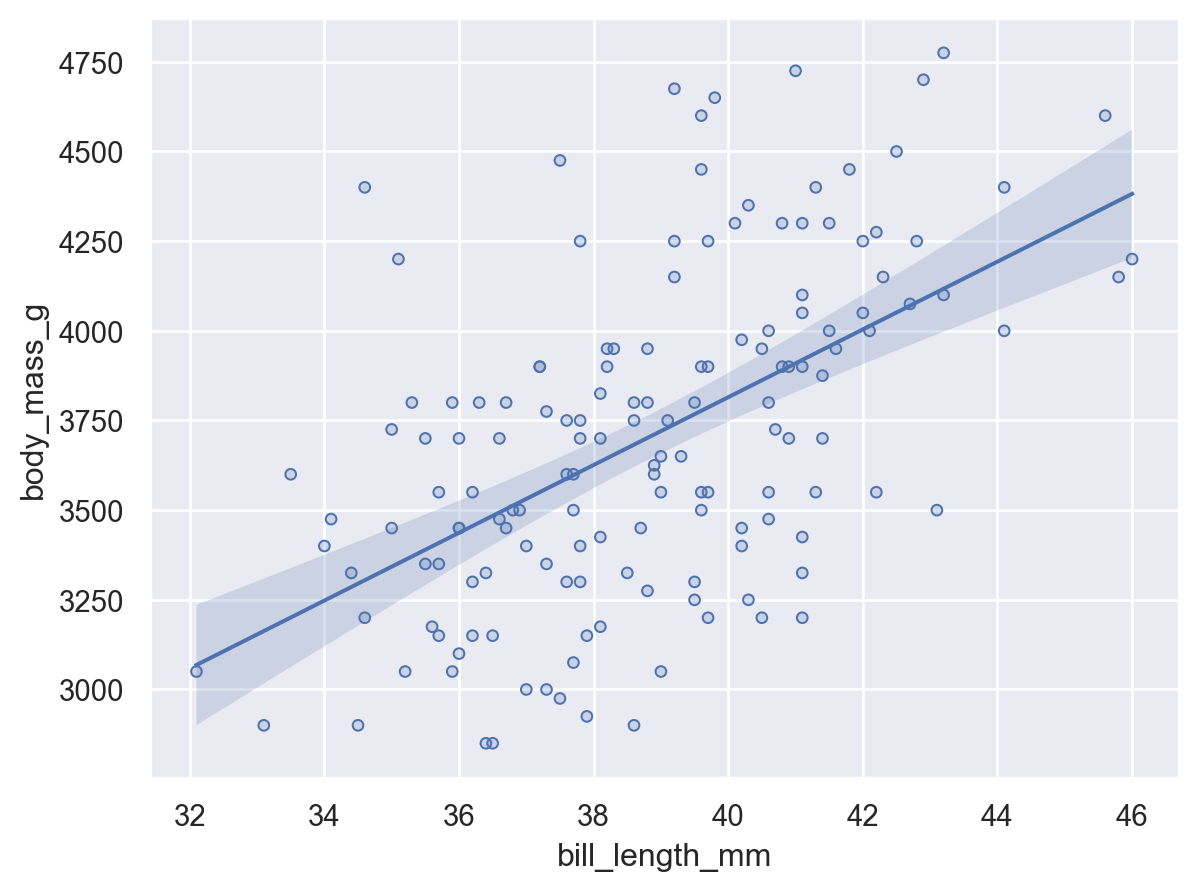

In [33]:
plot_regression_w_ci(
    penguins[penguins.species == "Adelie"], xvar="bill_length_mm", yvar="body_mass_g"
)

In [34]:
so.Plot?

Init signature:
so.Plot(
    *args,
    data=None,
    x=None,
    y=None,
    color=None,
    alpha=None,
    fill=None,
    marker=None,
    pointsize=None,
    stroke=None,
    linewidth=None,
    linestyle=None,
    fillcolor=None,
    fillalpha=None,
    edgewidth=None,
    edgestyle=None,
    edgecolor=None,
    edgealpha=None,
    text=None,
    halign=None,
    valign=None,
    offset=None,
    fontsize=None,
    xmin=None,
    xmax=None,
    ymin=None,
    ymax=None,
    group=None,
)
Docstring:     
An interface for declaratively specifying statistical graphics.

Plots are constructed by initializing this class and adding one or more
layers, comprising a `Mark` and optional `Stat` or `Move`.  Additionally,
faceting variables or variable pairings may be defined to divide the space
into multiple subplots. The mappings from data values to visual properties
can be parametrized using scales, although the plot will try to infer good
defaults when scales are not explicitly defined.


In [ ]:
so.Plot(
    y_hats,
)

In [ ]:
    # Build chart
    reg = so.Plot(predictions, "").add(so.Lines())
    ci = (
        alt.Chart(predictions)
        .mark_errorband()
        .encode(
            x=xvar,
            y=alt.Y("ci_low", title=yvar),
            y2="ci_high",
        )
    )
    chart = ci + reg


In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
